# 1. Importing the libraries

In [39]:
import pandas as pd

# 2. Importing the dataset

In [40]:
data = pd.read_csv('heart.csv')

# 3. Taking care of missing values

In [41]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# 4. Taking care of duplicate values

In [42]:
data_dup = data.duplicated() .any()

In [43]:
data_dup

True

In [44]:
data = data.drop_duplicates()

In [45]:
data_dup = data.duplicated() .any()

In [46]:
data_dup

False

# 5. Data processing

In [47]:
cate_val=[]
cont_val=[]

for column in data.columns:
    if data[column] .nunique() <=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [48]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [49]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# 6. Encoding categorical column

In [50]:
cate_val


['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [51]:
data['cp'].unique ()




array([0, 1, 2, 3], dtype=int64)

In [54]:
# validdate columns in cate_val
valid_columns = [col for col in cate_val if col in data.columns]

# check if 'sex' is in cate_val and remove it if it exists
if 'sex' in valid_columns:
    valid_columns.remove('sex')
else:
    print("'sex' is not in the list")

# check if 'target' is in cate_val and remove it if it exists
if 'target' in valid_columns:
    valid_columns.remove('target')
else:
    print("'target' is not in the list")

# proceed with getting dummy variables
if valid_columns:
    data = pd.get_dummies(data, columns=valid_columns, drop_first=True)
else:
    print("No valid columns to encode")

No valid columns to encode


In [55]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,53,1,140,203,155,3.1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,70,1,145,174,125,2.6,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,61,1,148,203,161,0.0,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,62,0,138,294,106,1.9,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


# 7. Feature scaling

In [56]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,53,1,140,203,155,3.1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,70,1,145,174,125,2.6,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,61,1,148,203,161,0.0,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,62,0,138,294,106,1.9,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
st = StandardScaler()
data[cont_val] = st.fit_transform(data[cont_val])

In [59]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


# 8. Spliting the dataset into the training set and test set

In [60]:
X = data.drop('target', axis=1)

In [61]:
y = data['target']

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [64]:
y_test

245    1
349    0
135    0
389    1
66     1
      ..
402    1
123    1
739    0
274    1
256    1
Name: target, Length: 61, dtype: int64

# 9. Logistic Regression

In [65]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [68]:
y_pred1 = log.predict(X_test)

In [69]:
from sklearn.metrics import accuracy_score

In [70]:
accuracy_score(y_test,y_pred1)

0.7868852459016393

# 10. SVC

In [71]:
from sklearn import svm

In [72]:
svm = svm.SVC ()

In [74]:
svm.fit(X_train,y_train)

SVC()

In [75]:
y_pred2 = svm.predict(X_test)

In [76]:
accuracy_score(y_test,y_pred2)

0.8032786885245902

# 11. KNeighbors Classifier

In [77]:
from sklearn.neighbors import KNeighborsClassifier

In [79]:
knn = KNeighborsClassifier()

In [80]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [81]:
y_pred3=knn.predict(X_test)

In [82]:
accuracy_score(y_test,y_pred3)

0.7377049180327869

In [83]:
score = []

for k in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    score.append(accuracy_score(y_test,y_pred))

In [84]:
score

[0.7213114754098361,
 0.8032786885245902,
 0.7049180327868853,
 0.7049180327868853,
 0.7377049180327869,
 0.8032786885245902,
 0.7868852459016393,
 0.8032786885245902,
 0.7704918032786885,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7540983606557377,
 0.7377049180327869,
 0.7540983606557377,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869]

In [86]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
(accuracy_score(y_test,y_pred))

0.8032786885245902

# Non-Linear ML Algorithms

In [87]:
data = pd.read_csv ('heart.csv')

In [88]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [89]:
data = data.drop_duplicates ()

In [90]:
data.shape

(302, 14)

In [91]:
X = data.drop('target',axis=1)
y=data['target']

In [92]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

# 12. Decision Tree Classifier

In [93]:
from sklearn.tree import DecisionTreeClassifier

In [94]:
dt = DecisionTreeClassifier()

In [95]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [96]:
y_pred4= dt.predict(X_test)

In [97]:
accuracy_score(y_test,y_pred4)

0.7540983606557377

# 13. Random Forest Classifier

In [98]:
from sklearn.ensemble import RandomForestClassifier

In [99]:
rf = RandomForestClassifier()

In [100]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [104]:
y_pred5 = rf.predict(X_test)

In [105]:
accuracy_score(y_test,y_pred5)

0.8032786885245902

# 14. Gradient Boosting Classifier

In [106]:
from sklearn.ensemble import GradientBoostingClassifier

In [107]:
gbc = GradientBoostingClassifier ()

In [108]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [109]:
y_pred6 = gbc.predict(X_test)

In [110]:
accuracy_score(y_test,y_pred6)

0.819672131147541

In [114]:
final_data = pd.DataFrame ({'Models': ['LR' ,'SVM' ,'KNN' ,'DT' ,'RF' ,'GB',] , 'ACC':[accuracy_score(y_test,y_pred1), accuracy_score(y_test,y_pred2), accuracy_score(y_test,y_pred3), accuracy_score(y_test,y_pred4), accuracy_score(y_test,y_pred5), accuracy_score(y_test,y_pred6)]})

In [115]:
final_data

,Models,ACC
0,LR,0.786885
1,SVM,0.803279
2,KNN,0.737705
3,DT,0.754098
4,RF,0.803279
5,GB,0.819672


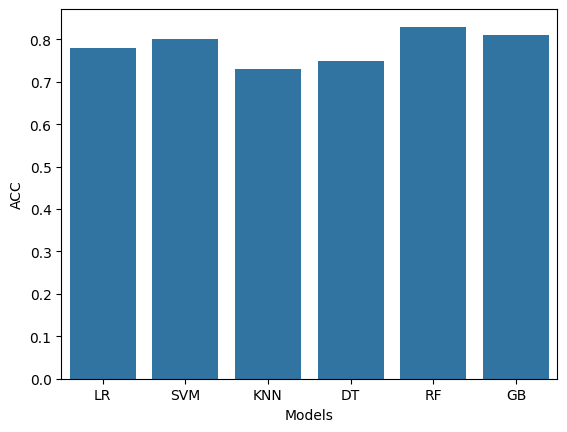

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
data = {
    'Models': ['LR', 'SVM', 'KNN', 'DT', 'RF', 'GB'],
    'ACC': [0.78, 0.80, 0.73, 0.75, 0.83, 0.81]
}

# Create a DataFrame
final_data = pd.DataFrame(data)

# Plotting
sns.barplot(x=final_data['Models'], y=final_data['ACC'])
plt.show()

In [117]:
data = pd.read_csv('heart.csv')

In [118]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [119]:
data = data.drop_duplicates ()

In [120]:
X = data.drop('target' ,axis=1)
y=data['target']

In [121]:
X.shape

(302, 13)

In [122]:
from sklearn.ensemble import RandomForestClassifier

In [123]:
rf = RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier()

# 15. Prediction on New Data

In [124]:
import pandas as pd

In [125]:
new_data = pd.DataFrame ({
    'age' :52,
    'sex' :1,
    'cp' :0,
    'trestbps' :125,
    'chol' :212,
    'fbs' :0,
    'restecg' :1,
    'thalach' :168,
    'exang': 0,
    'oldpeak' :1.0,
    'slope' :2,
    'ca' :2,
    'thal' :3,
}, index=[0])

In [126]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [127]:
p = rf.predict(new_data)
if p[0]==0:
    print ("No Disease")
else:
    print("Disease")

No Disease


# 16. Save Model using joblib

In [128]:
import joblib

In [129]:
joblib.dump(rf, 'model_joblib_heart')

['model_joblib_heart']

In [131]:
model = joblib.load('model_joblib_heart')

In [132]:
model.predict(new_data)

array([0], dtype=int64)

# GUI

In [ ]:
from tkinter import *
import joblib

In [ ]:
from tkinter import Tk, Label, Button, Entry
import joblib

# Function to predict heart disease
def predict_heart_disease():
    try:
        # Extract user inputs from the Entry widgets
        p1 = int(e1.get())
        p2 = int(e2.get())
        p3 = int(e3.get()) 
        p4 = int(e4.get())
        p5 = int(e5.get())
        p6 = int(e6.get())
        p7 = int(e7.get())
        p8 = int(e8.get())
        p9 = int(e9.get())
        p10 = float(e10.get())
        p11 = int(e11.get())
        p12 = int(e12.get())
        p13 = int(e13.get())

        # Load the pre-trained model
        model = joblib.load('model_joblib_heart')
        
        # Predict the result
        result = model.predict([[p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12, p13]])

        # Display the result
        if result[0] == 0:
            Label(master, text="No Heart Disease Detected").grid(row=31)
        else:
            Label(master, text="Heart Disease Detected").grid(row=31)

    except Exception as e:
        # Handle errors and display the error message
        Label(master, text=f"Error: {e}").grid(row=31)

# Create the Tkinter window
master = Tk()
master.title("Heart Disease Predictor")

# Create labels and input fields
Label(master, text="Enter the following details:").grid(row=0, column=0, columnspan=2)

labels = [
    "Age", "Sex", "Chest Pain Type", "Resting BP", "Cholesterol", "Fasting Blood Sugar",
    "Rest ECG", "Max Heart Rate", "Exercise Induced Angina", "Oldpeak", "Slope", "Ca", "Thal"
]

entries = []
for i, label_text in enumerate(labels):
    Label(master, text=label_text).grid(row=i+1, column=0)
    entry = Entry(master)
    entry.grid(row=i+1, column=1)
    entries.append(entry)

# Assign entry fields to variables for easier access
e1, e2, e3, e4, e5, e6, e7, e8, e9, e10, e11, e12, e13 = entries

# Create the Predict button
Button(master, text="Predict", command=predict_heart_disease).grid(row=30, column=0, columnspan=2)

# Run the Tkinter event loop
master.mainloop()
